## SPAM SMS DETECTION
* Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings with  classifiers like Naive Bayes, Logistic Regression, or Support Vector Machines to identify spam messages

### Import Libraries

In [32]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from collections import Counter

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aizaa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aizaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Read Data
* Dataset used from Kaggle https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [35]:
data = pd.read_csv('spam.csv', encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [37]:
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [38]:
data[data["Unnamed: 2"].notna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


In [39]:
data[data["Unnamed: 3"].notna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...,JUST REALLYNEED 2DOCD.PLEASE DONTPLEASE DONTIG...,"U NO THECD ISV.IMPORTANT TOME 4 2MORO\""""",NaN
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3145,ham,\SHIT BABE.. THASA BIT MESSED UP.YEH,SHE SHUDVETOLD U. DID URGRAN KNOW?NEWAY,"ILLSPEAK 2 U2MORO WEN IM NOT ASLEEP...\""""",NaN
3506,ham,Two fundamentals of cool life: \Walk,"like you are the KING\""...! OR \""Walk like yo...","whoever is the KING\""!... Gud nyt""",NaN
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""


In [40]:
data[data["Unnamed: 4"].notna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
2255,ham,I just lov this line: \Hurt me with the truth,I don't mind,i wil tolerat.bcs ur my someone..... But,"Never comfort me with a lie\"" gud ni8 and swe..."
3525,ham,\HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...,HAD A COOL NYTHO,TX 4 FONIN HON,"CALL 2MWEN IM BK FRMCLOUD 9! J X\"""""
4668,ham,"When I was born, GOD said, \Oh No! Another IDI...",GOD said,"\""OH No! COMPETITION\"". Who knew","one day these two will become FREINDS FOREVER!"""
5048,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""


In [41]:
df=data
data.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [42]:
# Dropping the unncecessary column for this task
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [43]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [44]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [45]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

### EDA 

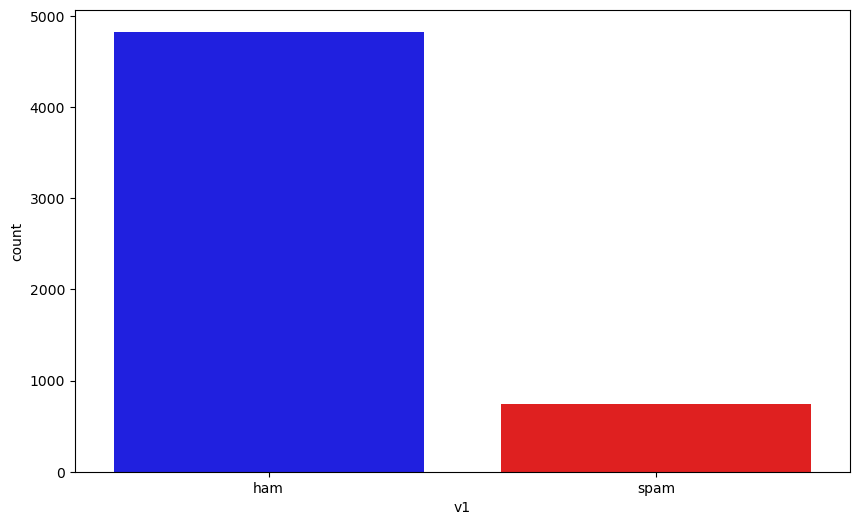

In [46]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="v1", palette=["blue", "red"])
plt.show()

In [47]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [48]:
df["Characters Length"] = df["v2"].apply(len)  
df["Words Length"] = df.apply(lambda row: nltk.word_tokenize(row["v2"]), axis=1).apply(len)
df["Sentences Length"] = df.apply(lambda row: nltk.sent_tokenize(row["v2"]), axis=1).apply(len)

df

,v1,v2,Characters Length,Words Length,Sentences Length
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1


In [49]:
df["Words"] = df.apply(lambda row: nltk.word_tokenize(row["v2"]), axis=1)
df.drop(['Words'], axis=1, inplace=True)

In [50]:
df.describe()

,Characters Length,Words Length,Sentences Length
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   v1                 5572 non-null   object
 1   v2                 5572 non-null   object
 2   Characters Length  5572 non-null   int64 
 3   Words Length       5572 non-null   int64 
 4   Sentences Length   5572 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 217.8+ KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Characters Length,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
Words Length,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
Sentences Length,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


<Axes: ylabel='count'>

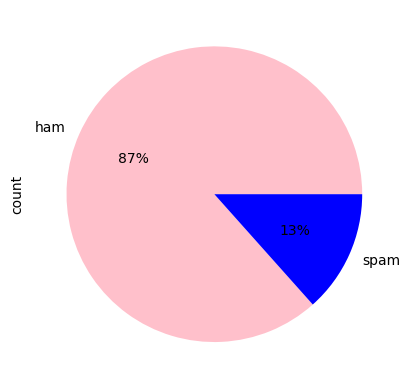

In [53]:

df["v1"].value_counts().plot(kind="pie", autopct="%1.0f%%", colors=["pink", "blue"])

<Figure size 1000x600 with 0 Axes>

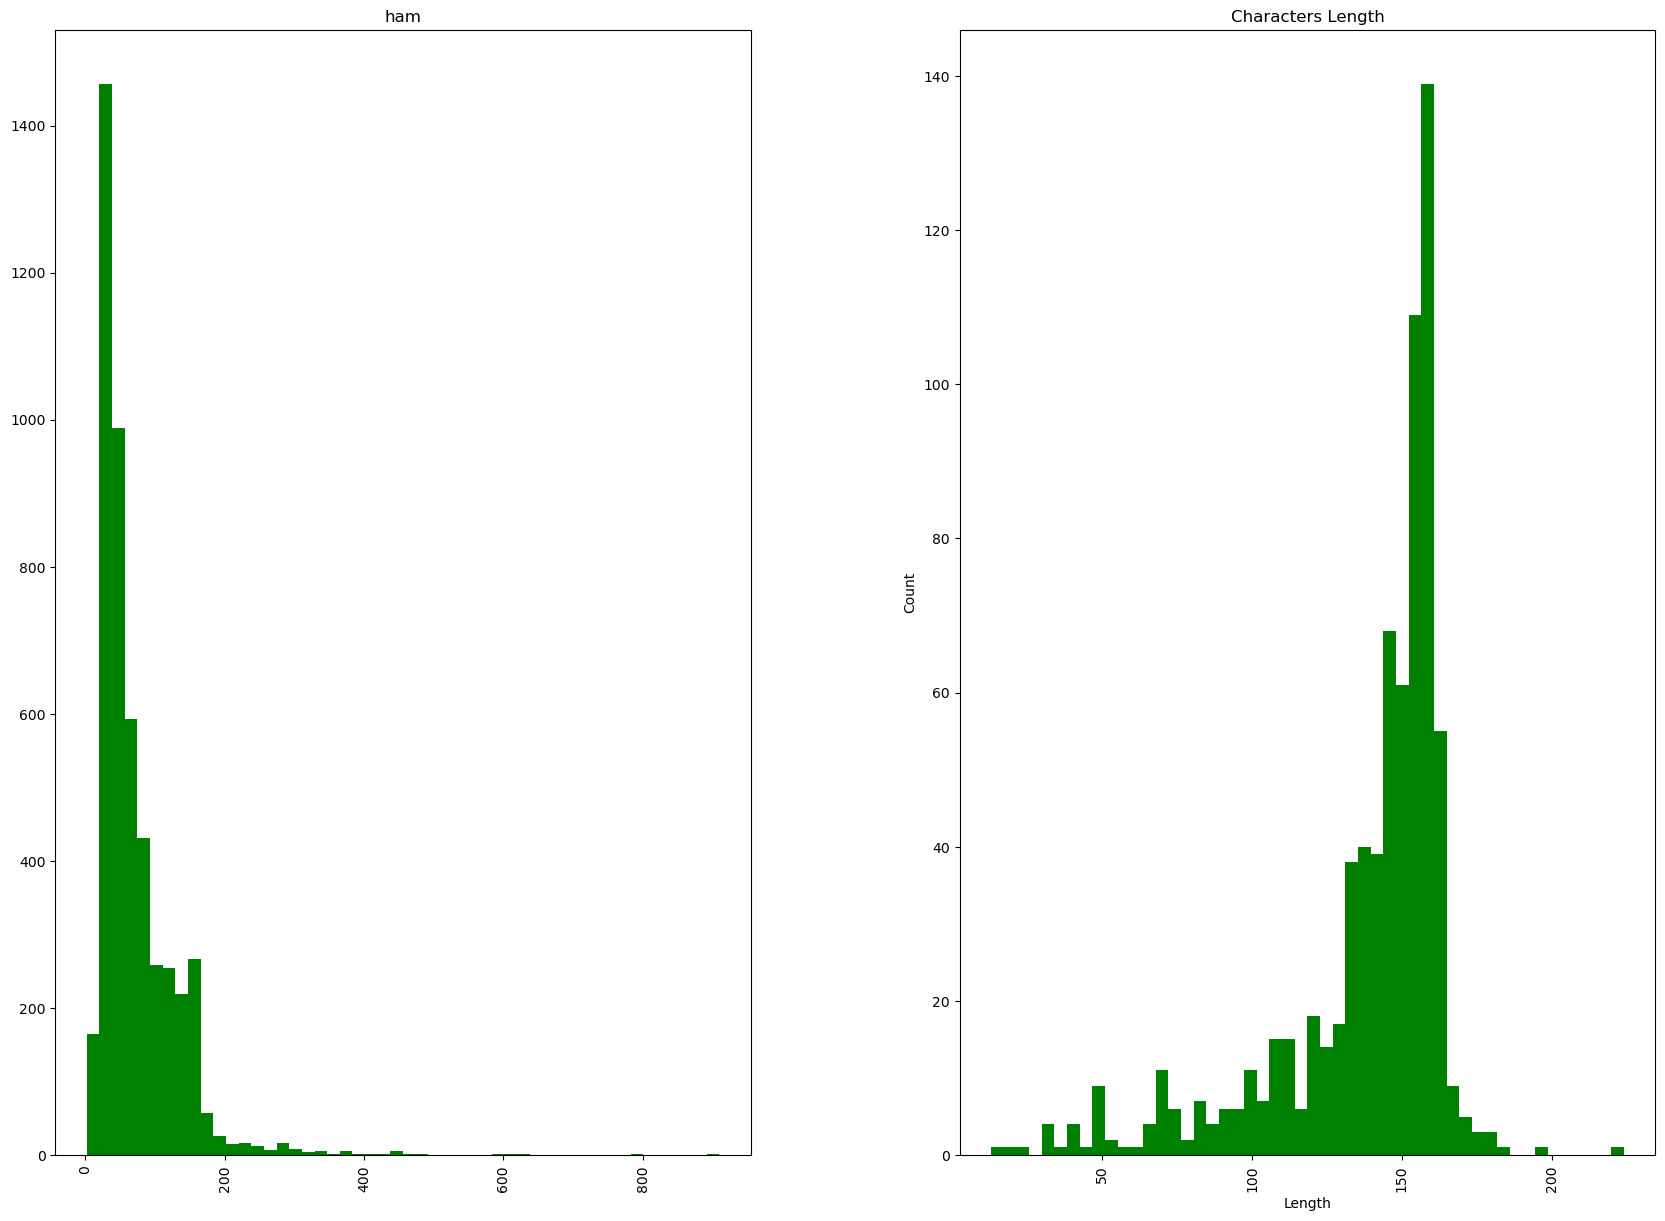

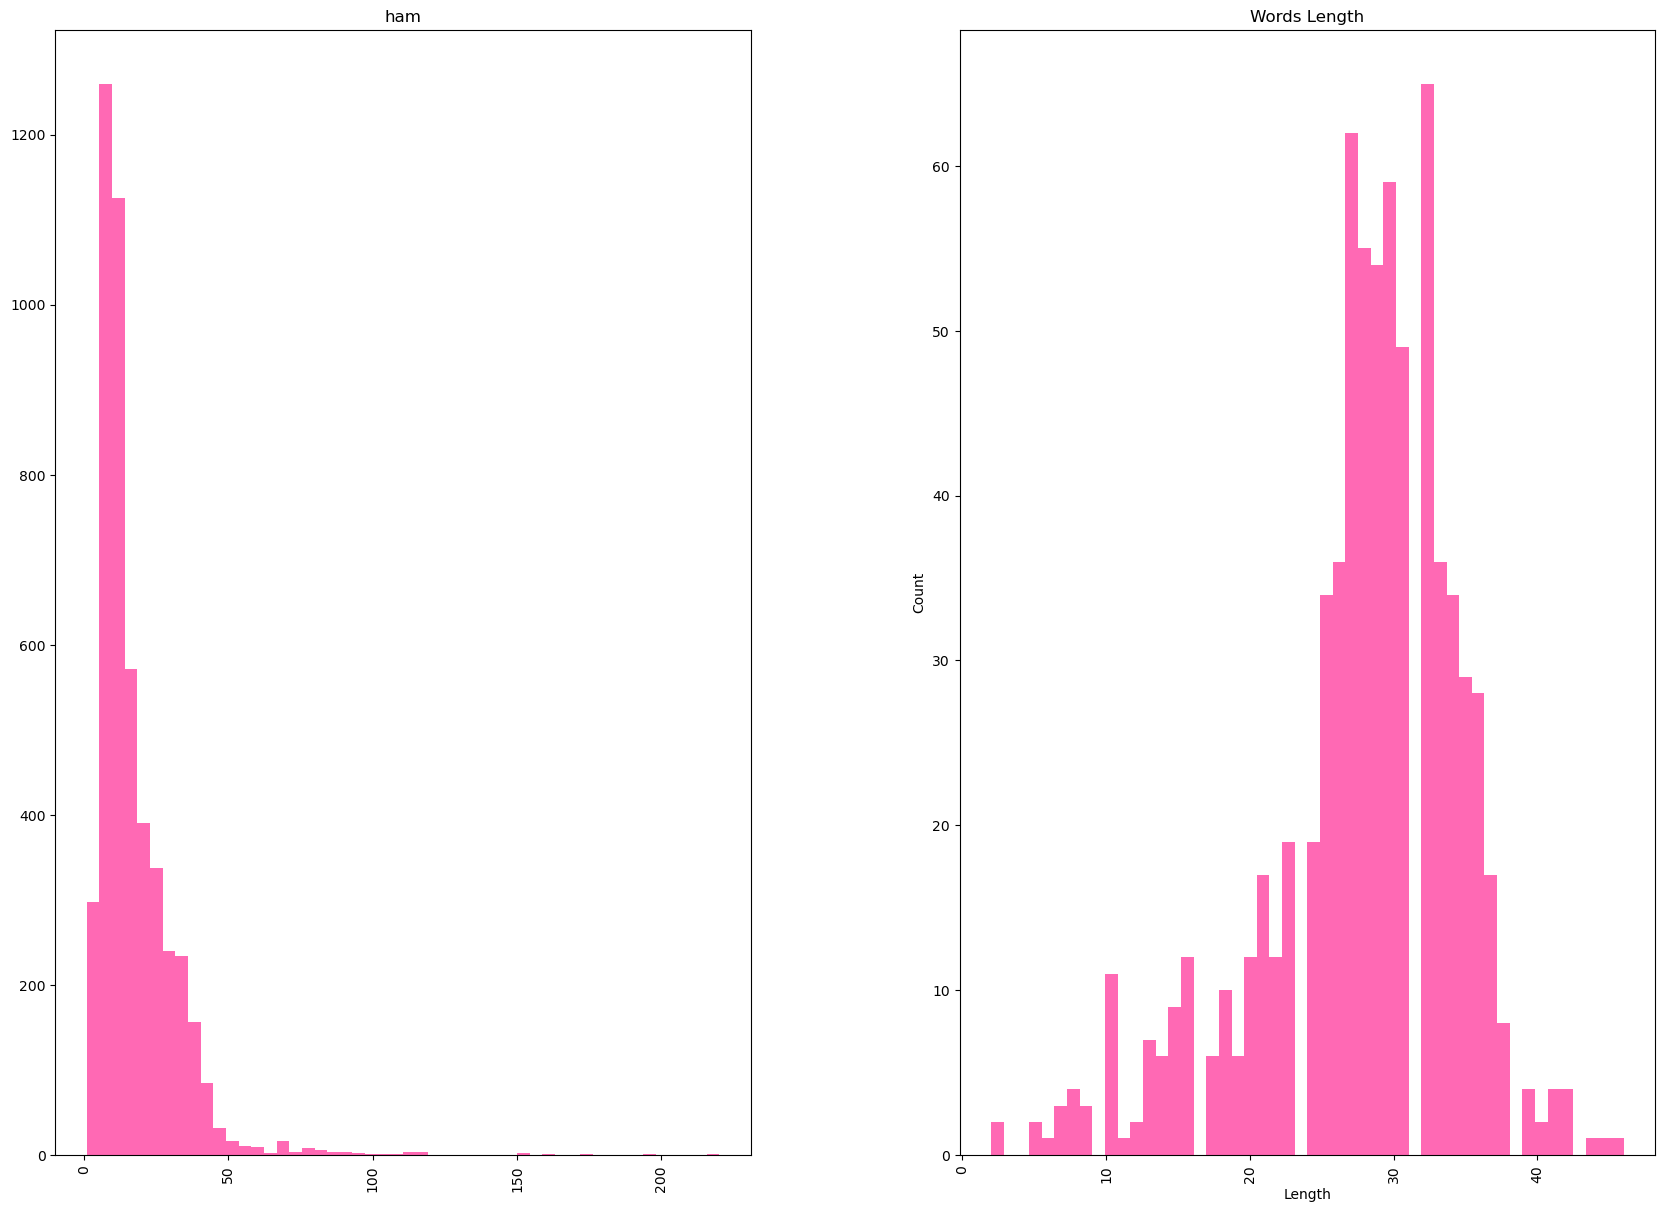

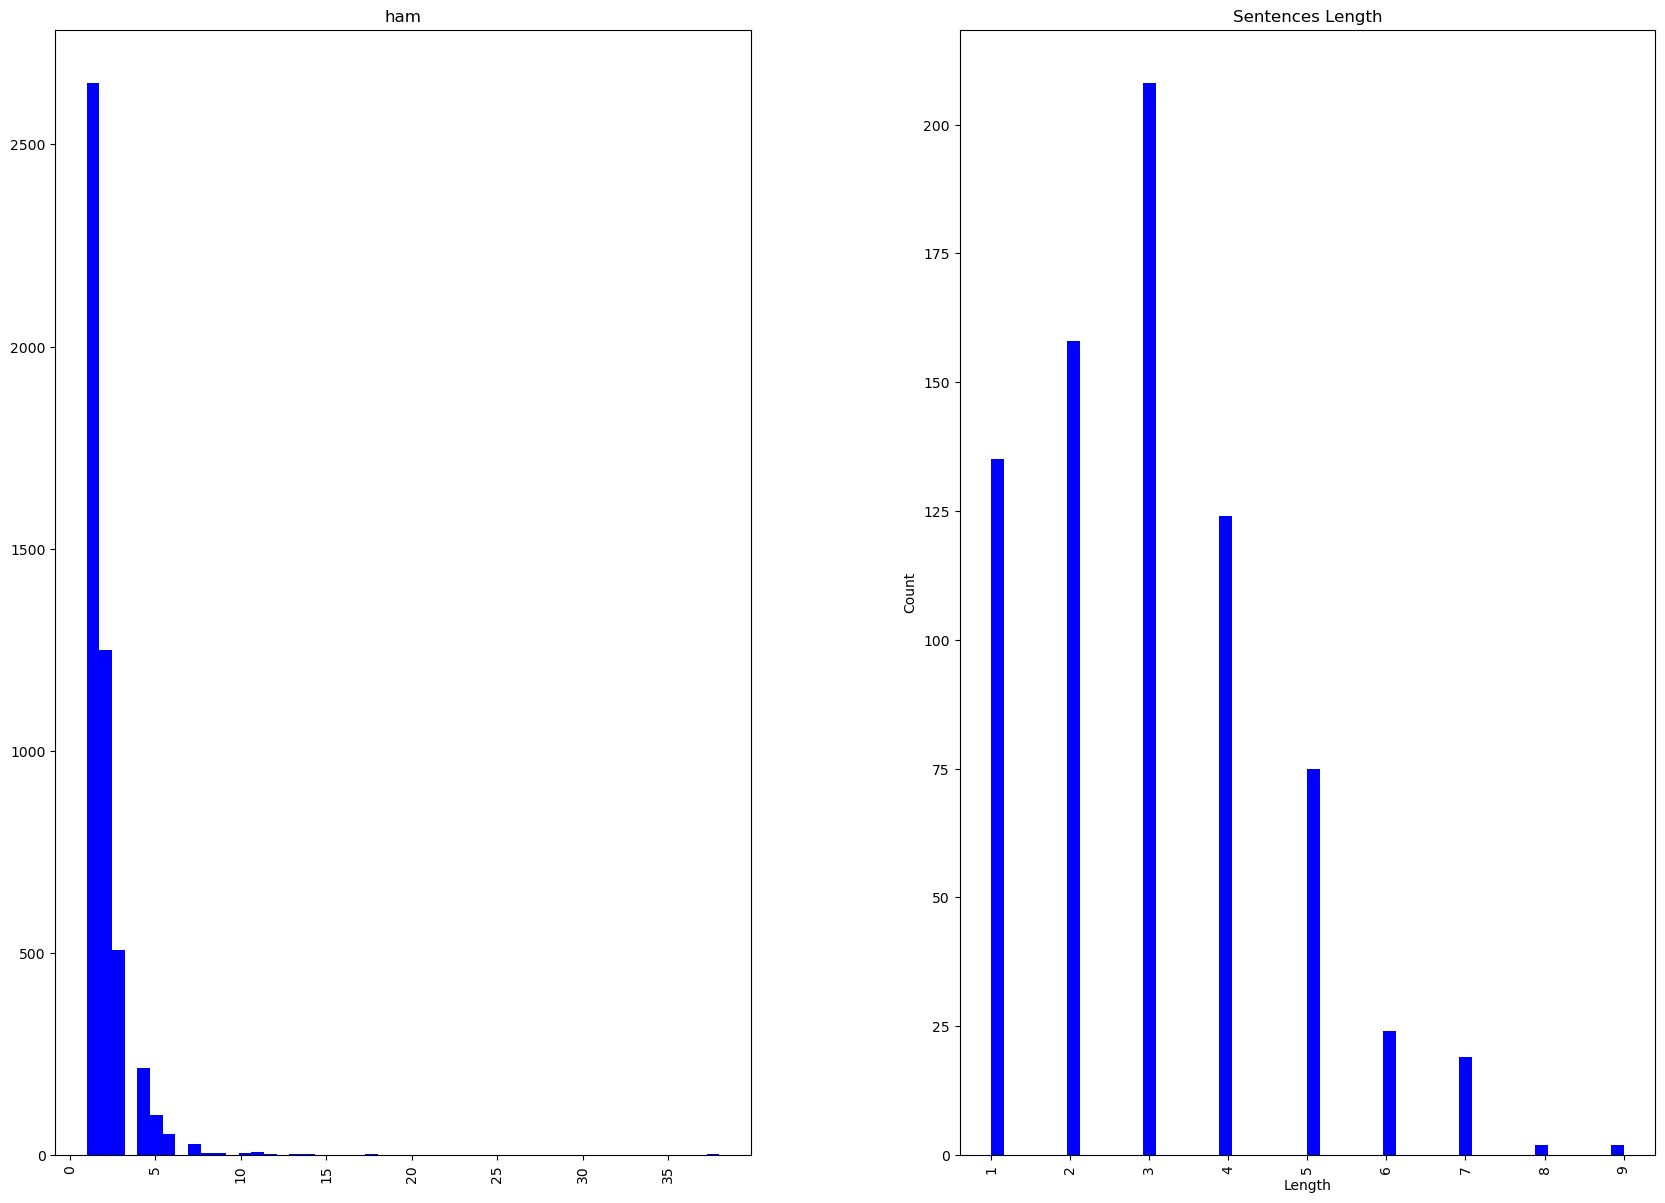

In [54]:
plt.figure(figsize=(10,6))
df.hist(column="Characters Length", by="v1", bins=50 ,figsize=(20,15), color="green")
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Characters Length")
df.hist(column="Words Length", by="v1", bins=50 ,figsize=(20,15), color="hotpink")
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Words Length")
df.hist(column="Sentences Length", by="v1", bins=50 ,figsize=(20,15), color="blue")
plt.xlabel("Length")
plt.ylabel("Count")
plt.title("Sentences Length")
plt.show()

c:\Users\aizaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aizaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\aizaa\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1000x600 with 0 Axes>

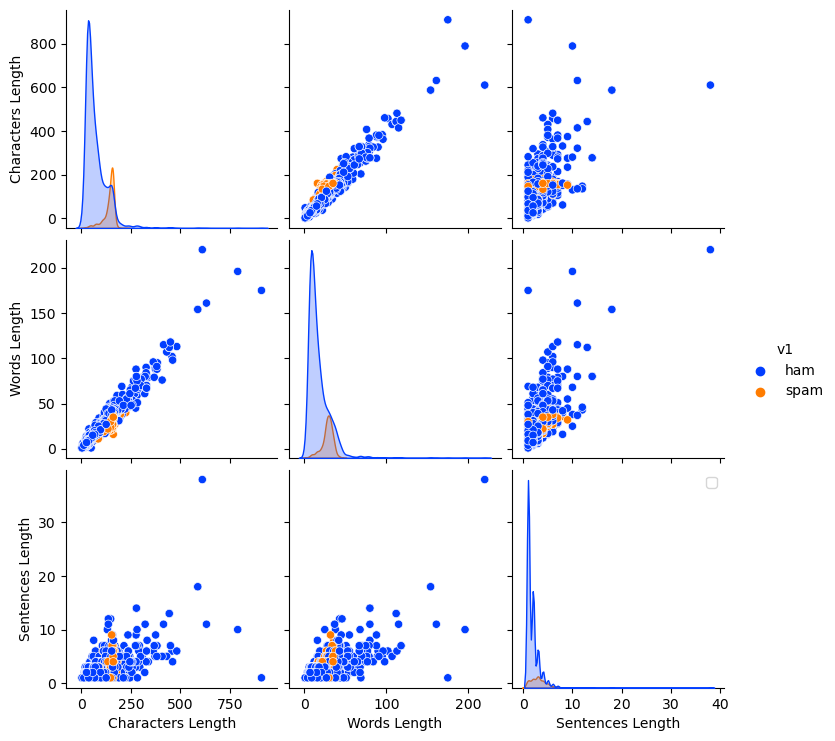

In [55]:
plt.figure(figsize=(10,6))
sns.pairplot(data=df, hue="v1",palette="bright")
plt.legend()
plt.show()

In [56]:
numerics = df.select_dtypes(include=[np.number])
numerics

,Characters Length,Words Length,Sentences Length
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1
...,...,...,...
5567,161,35,4
5568,37,9,1
5569,57,15,2
5570,125,27,1


<function matplotlib.pyplot.show(close=None, block=None)>

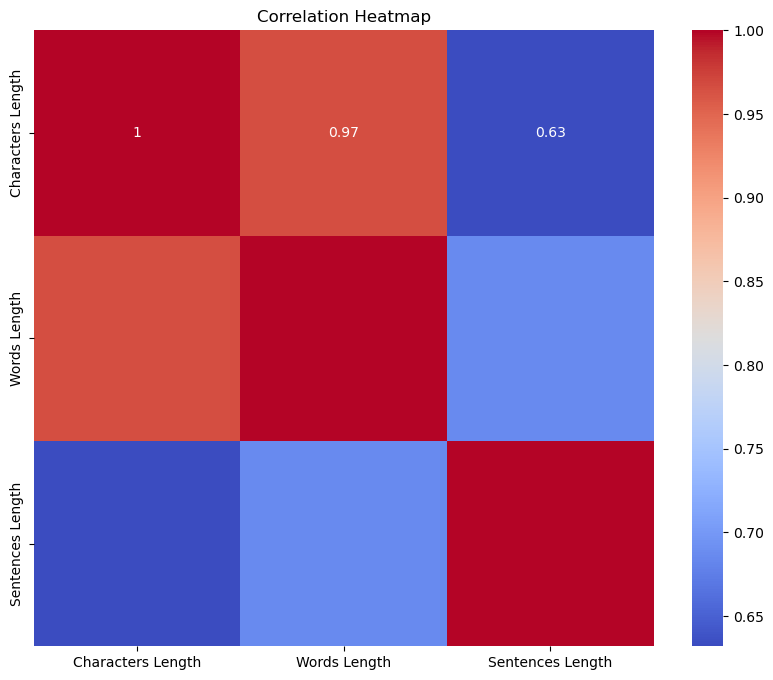

In [57]:
plt.figure(figsize=(10, 8))
correlation_matrix = numerics.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

### Data Preprocessing
* Data Cleaning

In [58]:
def remove_punc(text):
    text = ''.join([char for char in text if char not in string.punctuation])
    return text
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized
def stopwordremove(text):
    stop_words = stopwords.words('english')
    text = [word for word in text if word not in stop_words]
    return text
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
def cleantext(text):
    texts = re.sub("[^a-zA-Z]", " ", text)
    texts = texts.lower()
    texts = texts.split()
    texts = ' '.join(texts)
    texts = remove_punc(texts)
    texts = tokenize(texts)
    texts = stopwordremove(texts)
    texts = lemmatize(texts)
    return ' '.join(texts)
    
    
        
    

In [59]:
df["cleantext"] = df["v2"].apply(cleantext)

In [60]:
df

,v1,v2,Characters Length,Words Length,Sentences Length,cleantext
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,nd time tried contact u u pound prize claim ea...
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


* Making a Wordcloud to demonstrate the words frquency in each category

In [61]:
def wordcloudmake(text,title):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    plt.show()  

    

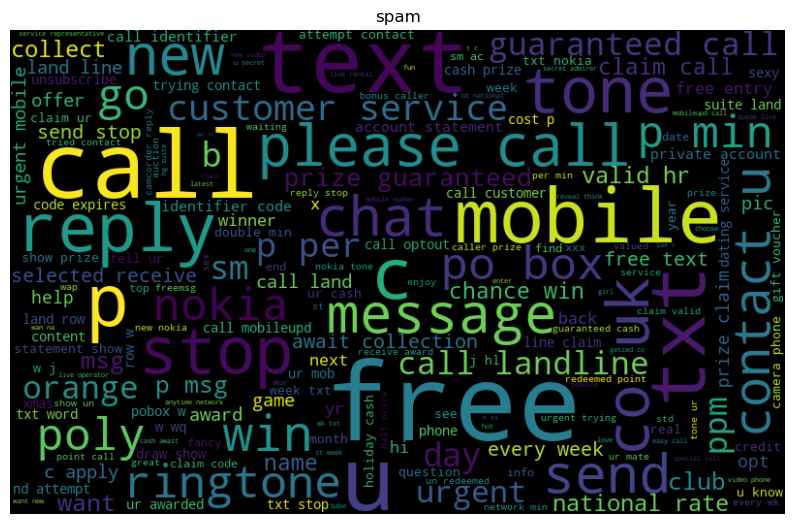

In [62]:
wordcloudmake(df[df["v1"] == "spam"]["cleantext"].str.cat(sep=" "),"spam")

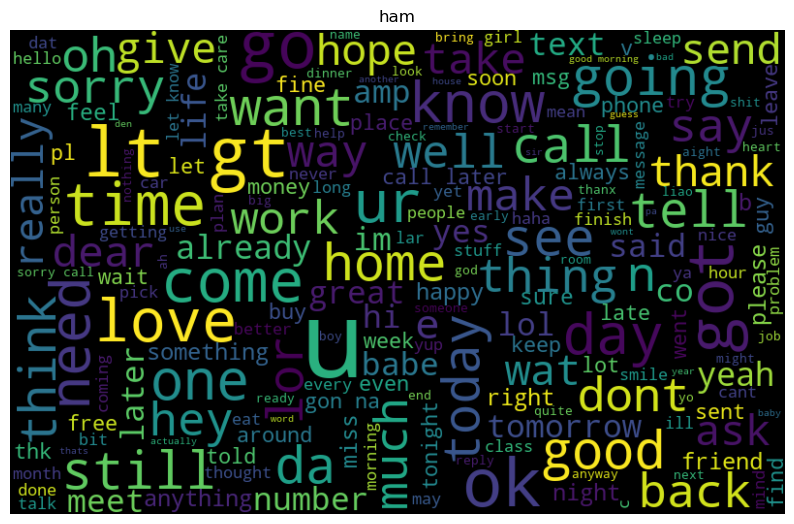

In [63]:
wordcloudmake(df[df["v1"] == "ham"]["cleantext"].str.cat(sep=" "),"ham")

In [64]:
hamwords = df[df.v1 == 'ham'].cleantext
count_wordsham = Counter()
for text in hamwords:
    for word in text.split():
        count_wordsham[word] += 1
count_wordsham.most_common(30)




[('u', 1084),
 ('get', 322),
 ('gt', 318),
 ('lt', 316),
 ('ok', 287),
 ('go', 280),
 ('call', 251),
 ('day', 249),
 ('come', 246),
 ('got', 245),
 ('know', 245),
 ('ur', 241),
 ('like', 235),
 ('good', 234),
 ('time', 228),
 ('love', 207),
 ('want', 185),
 ('one', 174),
 ('need', 173),
 ('going', 169),
 ('home', 165),
 ('lor', 162),
 ('sorry', 157),
 ('r', 155),
 ('da', 151),
 ('still', 150),
 ('k', 145),
 ('n', 144),
 ('today', 143),
 ('see', 139)]

In [65]:
spamwords = df[df.v1 == 'spam'].cleantext
count_wordsspam = Counter()
for text in spamwords:
    for word in text.split():
        count_wordsspam[word] += 1
count_wordsspam.most_common(30)

[('call', 388),
 ('free', 228),
 ('u', 195),
 ('p', 180),
 ('txt', 170),
 ('text', 145),
 ('ur', 144),
 ('mobile', 142),
 ('stop', 126),
 ('claim', 115),
 ('c', 107),
 ('reply', 106),
 ('www', 98),
 ('prize', 97),
 ('min', 90),
 ('tone', 90),
 ('get', 86),
 ('uk', 77),
 ('cash', 76),
 ('win', 73),
 ('service', 73),
 ('nokia', 71),
 ('send', 70),
 ('week', 69),
 ('new', 69),
 ('msg', 65),
 ('urgent', 63),
 ('com', 59),
 ('phone', 58),
 ('box', 57)]

<function matplotlib.pyplot.show(close=None, block=None)>

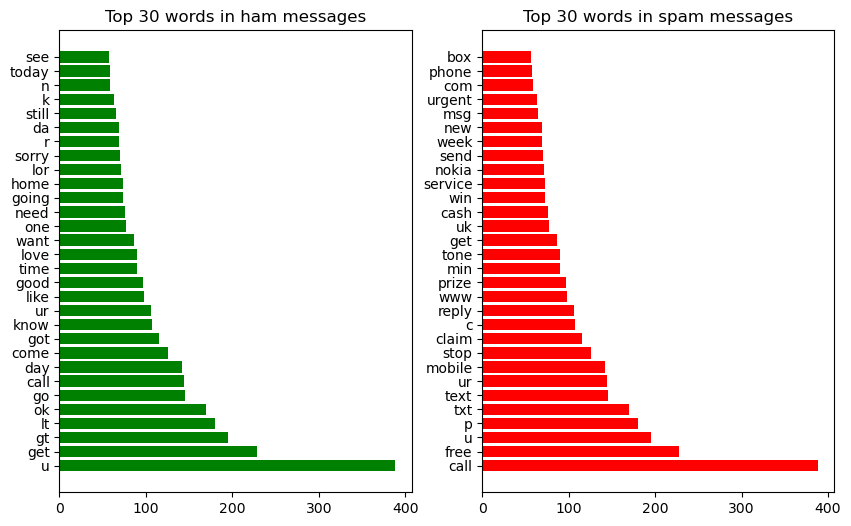

In [66]:
#Display Frequency and category to identify spam words
hamgraph, counter = zip(*count_wordsham.most_common(30))

spamgraph, counter = zip(*count_wordsspam.most_common(30))

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.barh(hamgraph, counter, color="green")
plt.title("Top 30 words in ham messages")
plt.subplot(1, 2, 2)
plt.barh(spamgraph, counter, color="red")   
plt.title("Top 30 words in spam messages")

plt.show


#### Vectorization

In [67]:
tfidf =  TfidfVectorizer()
X = tfidf.fit_transform(df["cleantext"]).toarray()
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* Encoding to 0 and 1

In [68]:
Labels = LabelEncoder()
df['Target'] = Labels.fit_transform(df['v1'])



In [69]:
df

,v1,v2,Characters Length,Words Length,Sentences Length,cleantext,Target
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think go usf life around though,0
...,...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,35,4,nd time tried contact u u pound prize claim ea...,1
5568,ham,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home,0
5569,ham,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestion,0
5570,ham,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...,0


### Training and Testing using GaussianBernoulli, Logistic Regression, KNN and SVM

In [70]:
y= df["Target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)



In [71]:
X_train.shape

(4346, 7017)

In [72]:
X_test.shape

(1226, 7017)

In [73]:
gaussmodel = GaussianNB()
logmodel = LogisticRegression()
knnmodel = KNeighborsClassifier()
svmmodel = SVC()


gaussmodel.fit(X_train, y_train)
logmodel.fit(X_train, y_train)
knnmodel.fit(X_train, y_train)
svmmodel.fit(X_train, y_train)


gausspred = gaussmodel.predict(X_test)
logpred = logmodel.predict(X_test)
knnpred = knnmodel.predict(X_test)
svmpred = svmmodel.predict(X_test)




In [ ]:
print("Gaussian Naive Bayes",classification_report(y_test, gausspred))
print("Logistic Regression",classification_report(y_test, logpred))
print("KNN",classification_report(y_test, knnpred))
print("SVM",classification_report(y_test, svmpred))

Gaussian Naive Bayes               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1060
           1       0.51      0.83      0.64       166

    accuracy                           0.87      1226
   macro avg       0.74      0.85      0.78      1226
weighted avg       0.91      0.87      0.88      1226

Logistic Regression               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1060
           1       0.96      0.66      0.78       166

    accuracy                           0.95      1226
   macro avg       0.95      0.83      0.88      1226
weighted avg       0.95      0.95      0.95      1226

KNN               precision    recall  f1-score   support

           0       0.91      1.00      0.96      1060
           1       1.00      0.40      0.58       166

    accuracy                           0.92      1226
   macro avg       0.96      0.70      0.77      1226
weighted avg       0.93      

### Model Results

In [ ]:
results = pd.DataFrame({
    
    'Accuracy': [accuracy_score(y_test, gausspred), accuracy_score(y_test, logpred), accuracy_score(y_test, knnpred), accuracy_score(y_test, svmpred)],
    'Recall': [recall_score(y_test, gausspred), recall_score(y_test, logpred), recall_score(y_test, knnpred), recall_score(y_test, svmpred)],
    'Precision': [precision_score(y_test, gausspred), precision_score(y_test, logpred), precision_score(y_test, knnpred), precision_score(y_test, svmpred)],
    'F1': [f1_score(y_test, gausspred), f1_score(y_test, logpred), f1_score(y_test, knnpred), f1_score(y_test, svmpred)]
},
    index = ['Gaussian Naive Bayes', 'Logistic Regression', 'KNN', 'SVM']
)


results



,Accuracy,Recall,Precision,F1
Gaussian Naive Bayes,0.871126,0.831325,0.514925,0.635945
Logistic Regression,0.949429,0.656627,0.956140,0.778571
KNN,0.919250,0.403614,1.000000,0.575107
SVM,0.975530,0.825301,0.992754,0.901316


In [ ]:
def plotconfusionmatrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    


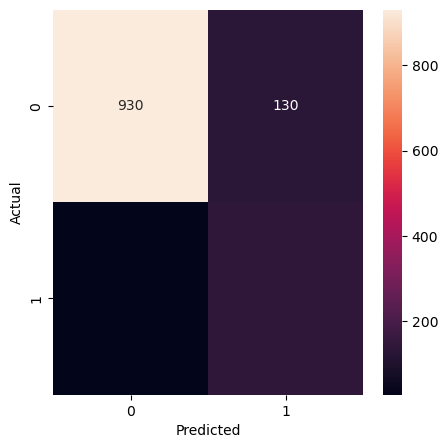

In [ ]:
plotconfusionmatrix(y_test, gausspred)



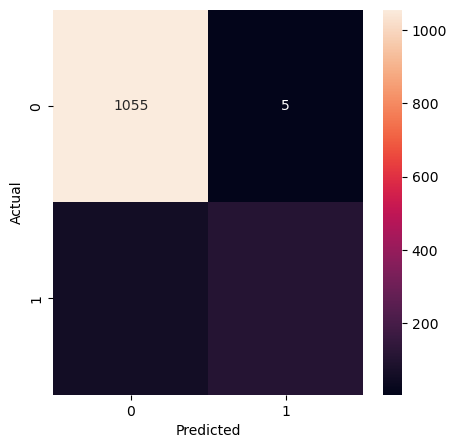

In [ ]:
plotconfusionmatrix(y_test, logpred)

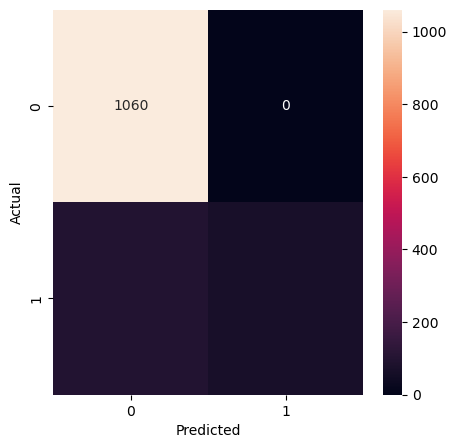

In [ ]:
plotconfusionmatrix(y_test, knnpred)

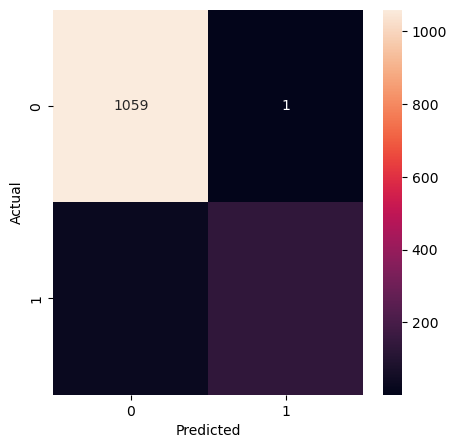

In [ ]:
plotconfusionmatrix(y_test, svmpred)